In [1]:
import netCDF4
import numpy as np
import datetime

In [2]:
# Load the classification file using the netCDF4 toolbox into memory.
f = netCDF4.Dataset('data/20180624_leipzig_classification.nc')

# To plot the atmospheric target classification look at the variables names and pick the right one.
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    title: Classification products from Leipzig
    location: Leipzig
    day: 24
    month: 6
    year: 2018
    history: 27 Jun 2018 07:56:55 - Generated from categorization data by Patric Seifert <seifert@tropos.de>
Categorization history: 27 Jun 2018 07:55:46 - Generated from level 1 data by Ewan O'Connor <e.j.oconnor@reading.ac.uk>
Radar history: Original data has been averaged to 30 seconds.
Lidar history: File converted with convert_pollyxt.m
Model history: 27-Jun-2018 07:52:19: Created from GDAS1 profiles produced with the profile binary in the HYSPLIT offline package using convert_gdas12pro.sh.
Gauge history: created from parsivel2-data by Patric Seifert, TROPOS
Microwave radiometer history: Created from HATPRO data with MWR-PRO V04 Retrieval with offset correction
    source: CloudNet categorization product (software version 0.10.2) comprising:
35.5 GHz Clo

In [3]:
print(f.variables['time'])
time = f.variables['time']
height = f.variables['height']
targets = f.variables['target_classification']

# To get the right time format for the plot, convert the timestemps in the classification file to 
# datetime format as seen in part4 of the tutorial.
dt = datetime.datetime(f.year, f.month, f.day)
dt_list = [dt + datetime.timedelta(seconds=h*3600) for h in time]


<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    axis: T
    units: hours since 2018-06-24 00:00:00 +0:00
    long_name: Time UTC
    standard_name: time
unlimited dimensions: 
current shape = (2879,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [4]:
%matplotlib inline

In [5]:
# plot with the rainrate
import matplotlib.pyplot as plt
import matplotlib
import Colormaps
from PlottingUtility import load_xy_style, load_cbar_style

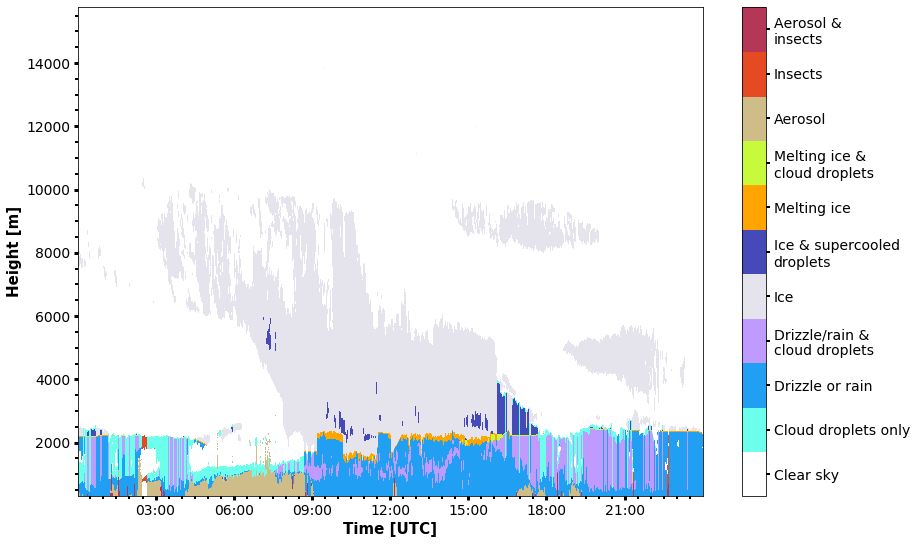

In [6]:
target_names = Colormaps.target_names
vmin, vmax = [-0.5, len(Colormaps.target_names) - 0.5]

# Plot the target classificaiton as pcolormesh plot using the clounet_target
fig, ax = plt.subplots(1, figsize=(14, 9))
pcmesh = ax.pcolormesh(dt_list, height, np.transpose(targets), 
                       cmap=Colormaps.cloudnet_map, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(pcmesh)

# Add the target labels to the colorbar
cbar.set_ticks(list(range(len(target_names))))
cbar.ax.set_yticklabels(target_names)

load_xy_style(ax)
load_cbar_style(cbar, cbar_label="")